##Data Loading and Cleaning

In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("covid-19-data.csv")
df = pd.DataFrame(data)
df.fillna('0') #will fill the missing places with 0


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [12]:
df.dtypes #it show us all the data types of the columns

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

##Basic Analysis

In [13]:
total_cases = df['Confirmed'].sum()
total_deaths = df['Deaths'].sum()
total_recovered = df['Recovered'].sum()

print(f"Total confirmed cases all over the world  :{total_cases}")
print(f"Total confirmed deaths all over the world :{total_deaths}")
print(f"Total revcovered cases all over the world :{total_recovered}")

Total confirmed cases all over the world  :16480485
Total confirmed deaths all over the world :654036
Total revcovered cases all over the world :9468087


In [14]:
# Top 10 countries by confirmed cases
top_cases = df.sort_values(by='Confirmed', ascending=False).head(10)
print("Top 10 countries by total cases:")
print(top_cases[['Country/Region', 'Confirmed']])


Top 10 countries by total cases:
     Country/Region  Confirmed
173              US    4290259
23           Brazil    2442375
79            India    1480073
138          Russia     816680
154    South Africa     452529
111          Mexico     395489
132            Peru     389717
35            Chile     347923
177  United Kingdom     301708
81             Iran     293606


In [15]:

#Moratlity rate = (deaths/cases) 100 for each country
# mortality_rate = (total_deaths/total_cases)*100
df['MortalityRate'] = df.apply(
    lambda row: (row['Deaths'] / row['Confirmed']) * 100 if row['Confirmed'] != 0 else 0,
    axis=1
)
df['MortalityRate'] = df['MortalityRate'].round(2).astype(str) + '%'
print(df[['Country/Region', 'Confirmed', 'Deaths', 'MortalityRate']])

         Country/Region  Confirmed  Deaths MortalityRate
0           Afghanistan      36263    1269          3.5%
1               Albania       4880     144         2.95%
2               Algeria      27973    1163         4.16%
3               Andorra        907      52         5.73%
4                Angola        950      41         4.32%
..                  ...        ...     ...           ...
182  West Bank and Gaza      10621      78         0.73%
183      Western Sahara         10       1         10.0%
184               Yemen       1691     483        28.56%
185              Zambia       4552     140         3.08%
186            Zimbabwe       2704      36         1.33%

[187 rows x 4 columns]


In [16]:
# Recovery rate = (recoveries / cases) * 100
df["RecoveryRate"] = df.apply(
    lambda row: (row['Recovered'] / row['Confirmed']) * 100 if row['Confirmed'] != 0 else 0,
    axis=1
)

df['RecoveryRate'] = df['RecoveryRate'].round(2).astype(str) + '%'
print(df[['Country/Region', 'Confirmed', 'Deaths', 'RecoveryRate']])

         Country/Region  Confirmed  Deaths RecoveryRate
0           Afghanistan      36263    1269       69.49%
1               Albania       4880     144       56.25%
2               Algeria      27973    1163       67.34%
3               Andorra        907      52       88.53%
4                Angola        950      41       25.47%
..                  ...        ...     ...          ...
182  West Bank and Gaza      10621      78       35.33%
183      Western Sahara         10       1        80.0%
184               Yemen       1691     483       49.26%
185              Zambia       4552     140       61.84%
186            Zimbabwe       2704      36       20.04%

[187 rows x 4 columns]


##Time Series and Trends

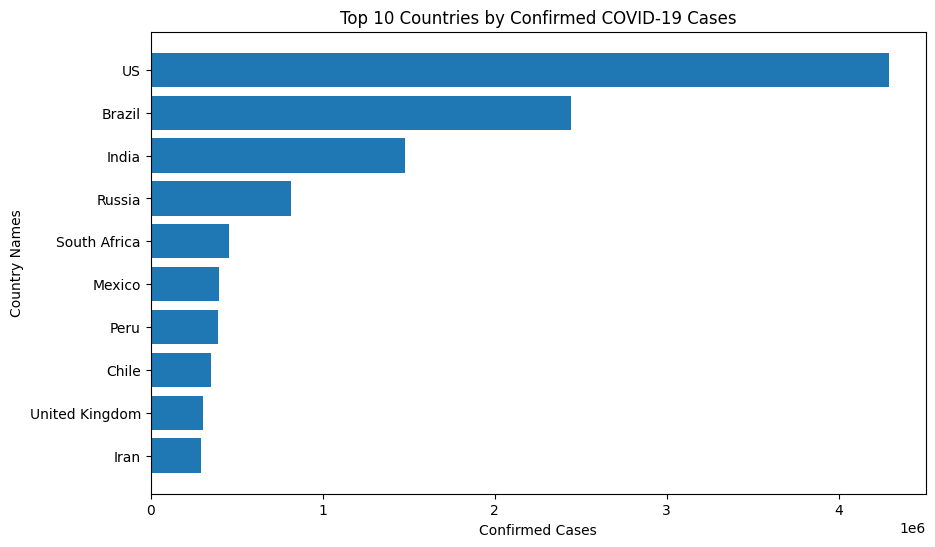

In [17]:
top10 = df.sort_values('Confirmed', ascending=False).head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# colors = plt.cm.viridis(np.linspace(0, 1, len(top10)))
plt.barh(top10['Country/Region'], top10['Confirmed'])
plt.xlabel('Confirmed Cases')
plt.ylabel('Country Names')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.gca().invert_yaxis()
plt.show()


##Visulizations

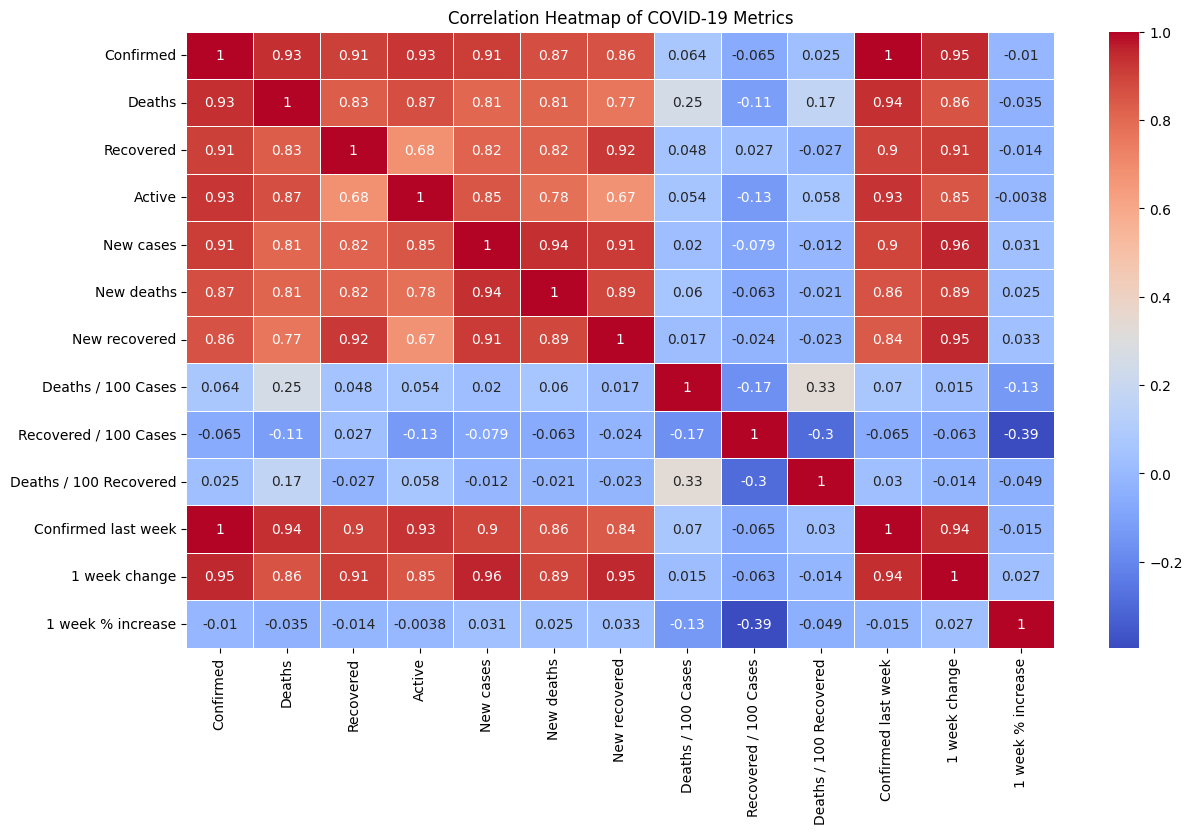

In [18]:
#Drawing Heatmap for numerical correlation
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.show()


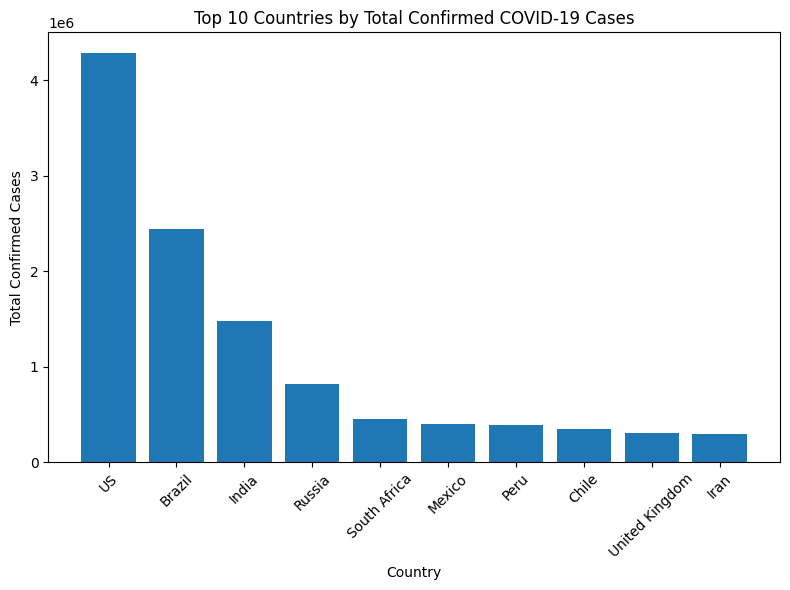

In [24]:
#Show top 10 countries with total cases on bar chart
top10 = df.sort_values(by='Confirmed', ascending=False).head(10)

# Step 2: Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(top10['Country/Region'], top10['Confirmed'])

# Step 3: Add labels
plt.title('Top 10 Countries by Total Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

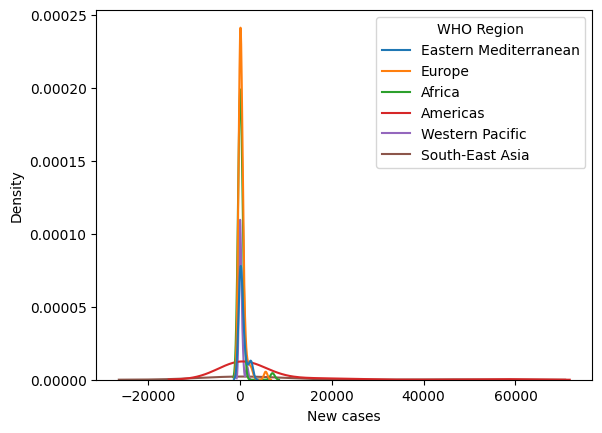

In [29]:
sns.kdeplot(x="New cases" , hue="WHO Region" , data=data)
plt.show()